# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import sys
sys.path.append("..")

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
# urls
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#data frame to hold waether info
weather_df = pd.DataFrame({
    'City': '',
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': '',
    'Date': []
})

# requests and data gathering
row = 0
for city in cities:
    try:
        q_url = f'{weather_url}q={city}&appid={weather_api_key}&units={units}'
        weather_json = requests.get(q_url).json()
        
        weather_df.loc[row,'City'] = city
        weather_df.loc[row,'Lat'] = round(weather_json['coord']['lat'],2)
        weather_df.loc[row,'Lng'] = round(weather_json['coord']['lon'],2)
        weather_df.loc[row,'Max Temp'] = weather_json['main']['temp_max']
        weather_df.loc[row,'Humidity'] = weather_json['main']['humidity']
        weather_df.loc[row,'Cloudiness'] = weather_json['clouds']['all']
        weather_df.loc[row,'Wind Speed'] = weather_json['wind']['speed']
        weather_df.loc[row,'Country'] = weather_json['sys']['country']
        weather_df.loc[row,'Date'] = weather_json['dt']
        
        print(f'Processing Record {row} | {city}')
        row+=1
    except:
        print(f'City:{city} not found. Skipping...')

Processing Record 0 | bredasdorp
Processing Record 1 | te anau
Processing Record 2 | rikitea
Processing Record 3 | houma
Processing Record 4 | ushuaia
Processing Record 5 | pevek
Processing Record 6 | victor harbor
Processing Record 7 | busselton
Processing Record 8 | jamestown
Processing Record 9 | barranca
Processing Record 10 | albany
City:barawe not found. Skipping...
Processing Record 11 | cape town
Processing Record 12 | hwange
Processing Record 13 | lagoa
Processing Record 14 | khatanga
Processing Record 15 | mount isa
Processing Record 16 | puerto ayora
Processing Record 17 | iralaya
Processing Record 18 | menongue
Processing Record 19 | bluff
Processing Record 20 | hilo
Processing Record 21 | vaini
City:marcona not found. Skipping...
Processing Record 22 | san patricio
Processing Record 23 | lapua
Processing Record 24 | jiuquan
Processing Record 25 | adrar
Processing Record 26 | mezen
Processing Record 27 | geraldton
Processing Record 28 | belmonte
Processing Record 29 | matau

Processing Record 227 | hervey bay
Processing Record 228 | souillac
Processing Record 229 | cabedelo
Processing Record 230 | wenling
Processing Record 231 | troitskoye
Processing Record 232 | namie
Processing Record 233 | birobidzhan
Processing Record 234 | torbay
Processing Record 235 | saldanha
Processing Record 236 | anadyr
Processing Record 237 | manica
Processing Record 238 | vestmannaeyjar
Processing Record 239 | chincha alta
Processing Record 240 | fort nelson
Processing Record 241 | letlhakeng
Processing Record 242 | lompoc
City:louisbourg not found. Skipping...
Processing Record 243 | porangatu
Processing Record 244 | lorengau
Processing Record 245 | lata
Processing Record 246 | hov
Processing Record 247 | ribeira grande
Processing Record 248 | port blair
Processing Record 249 | kushima
City:chagda not found. Skipping...
Processing Record 250 | russell
Processing Record 251 | raudeberg
Processing Record 252 | mahanoro
Processing Record 253 | wanning
City:vaitupu not found. Ski

Processing Record 459 | kamskiye polyany
Processing Record 460 | novyy urengoy
Processing Record 461 | kahului
Processing Record 462 | pizhanka
Processing Record 463 | shache
Processing Record 464 | grand-santi
Processing Record 465 | axim
Processing Record 466 | port-gentil
Processing Record 467 | koshurnikovo
Processing Record 468 | vila franca do campo
Processing Record 469 | misratah
City:yunjinghong not found. Skipping...
Processing Record 470 | jalu
Processing Record 471 | leh
City:rungata not found. Skipping...
Processing Record 472 | hermiston
Processing Record 473 | pisco
Processing Record 474 | dodoma
Processing Record 475 | seoul
Processing Record 476 | hanzhong
City:attawapiskat not found. Skipping...
Processing Record 477 | pozo colorado
Processing Record 478 | parabel
Processing Record 479 | leningradskiy
Processing Record 480 | ankang
Processing Record 481 | lazy
Processing Record 482 | sobolevo
Processing Record 483 | kirakira
Processing Record 484 | hobyo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
output_path = 'output_data/weather_data.csv'
weather_df.to_csv(output_path)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.53,20.04,14.00,94.0,9.0,1.54,ZA,1.615855e+09
1,te anau,-45.42,167.72,12.70,52.0,81.0,1.99,NZ,1.615855e+09
2,rikitea,-23.12,-134.97,27.02,75.0,85.0,5.09,PF,1.615855e+09
3,houma,29.60,-90.72,23.33,94.0,90.0,4.63,US,1.615855e+09
4,ushuaia,-54.80,-68.30,4.00,70.0,90.0,9.77,AR,1.615854e+09


In [96]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,21.019346,25.644458,11.355886,74.538726,55.707401,3.586282,1.615855e+09
std,33.797560,90.369985,15.224827,19.740837,40.594043,2.507535,7.786179e+01
min,-54.800000,-175.200000,-35.790000,3.000000,0.000000,0.220000,1.615854e+09
25%,-7.750000,-53.670000,0.000000,65.000000,9.000000,1.680000,1.615855e+09
50%,26.000000,30.690000,16.000000,79.000000,75.000000,3.090000,1.615855e+09
75%,50.970000,103.530000,24.700000,89.000000,97.000000,4.920000,1.615855e+09
max,78.220000,179.320000,33.000000,100.000000,100.000000,13.410000,1.615855e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
    

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

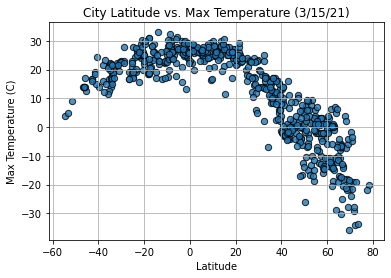

In [69]:
title = 'City Latitude vs. Max Temperature (3/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(6,4), title=title, alpha=0.80,edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Max Temperature (C)')
fig = scatter.get_figure()
fig.savefig('output_data/temp_v_lat.png')


The above graph looks at the max temperature compared to the city's latitude.
You can see that cities closer to the equator (0 latitude), have much higher max temperatures

## Latitude vs. Humidity Plot

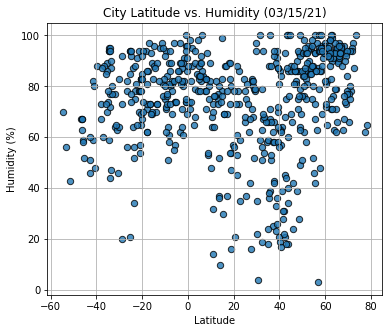

In [70]:
title = 'City Latitude vs. Humidity (03/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Humidity', title=title, grid=True, figsize=(6,5), alpha=0.80,edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Humidity (%)')
scatter.get_figure().savefig('output_data/humid_v_lat.png')

The above plot is showing the relationship between latitude of a city and its humidity. 
The average humidity value seems to be reletivley consistant, with a lot more outliers occuring 
at 20 to 40 degrees. Which coincidentally, is the same lattitude as the Sahara Desert.

## Latitude vs. Cloudiness Plot

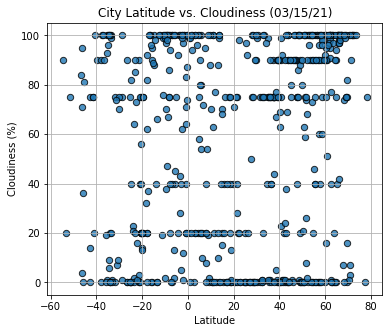

In [71]:
title = 'City Latitude vs. Cloudiness (03/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', title=title, grid=True, figsize=(6,5), alpha=0.80, edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Cloudiness (%)')

scatter.get_figure().savefig('output_data/cloud_v_lat.png')

Shown in the plot above is the relationship between latitude of a city and the percentage of cloudiness. This seems to be all over the board and no clear correlation can be made. 

## Latitude vs. Wind Speed Plot

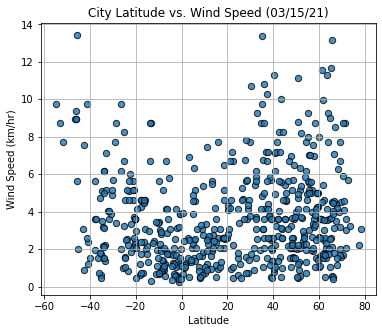

In [72]:
title = 'City Latitude vs. Wind Speed (03/15/21)'
scatter = weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', title=title, grid=True, figsize=(6,5), alpha=0.80, edgecolor='black', s=40)
x_label = scatter.set_xlabel('Latitude')
y_label = scatter.set_ylabel('Wind Speed (km/hr)')

scatter.get_figure().savefig('output_data/wind_v_lat.png')

In the figure above, showing latitude versus wind speeds, there seems to be no real pattern. Ignoring the extreme values below -40 degrees, most of the data lies within a reasonably small bound (0-10km/hr). Id say that this shows, at least for the day the data was gathered, winds were consistant. 

## Linear Regression

In [109]:
north = weather_df.loc[weather_df['Lat'] >=0]
south = weather_df.loc[weather_df['Lat'] < 0]

def plotLinRegress(x, y, xlabel, ylabel, labelpos, image_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-squared is: {rvalue**2}')
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, labelpos, fontsize=15, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f'output_data/{image_name}.png')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7919635447221601


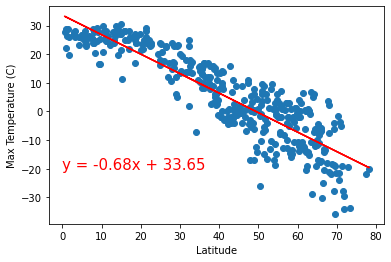

In [110]:
xlabel = 'Latitude'
ylabel = 'Max Temperature (C)'
labelpos = (0,-20)
plotLinRegress(north['Lat'], north['Max Temp'], xlabel, ylabel, labelpos, 'north_temps_v_lat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4529861479241491


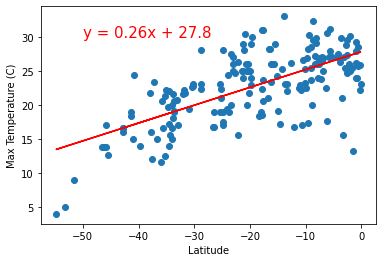

In [111]:
xlabel = 'Latitude'
ylabel = 'Max Temperature (C)'
labelpos = (-50, 30)
plotLinRegress(south['Lat'], south['Max Temp'], xlabel, ylabel, labelpos, 'south_temps_v_lat')

The two above plots show oppisite trends, which is expected. The further away from 0 you get, the lower you can expect the temperatures to be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06011209035520024


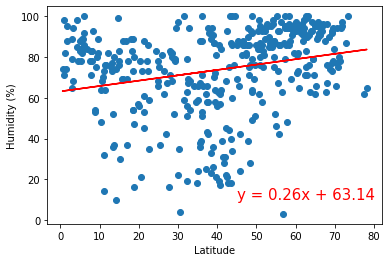

In [112]:
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
labelpos = (45,10)
plotLinRegress(north['Lat'], north['Humidity'], xlabel, ylabel, labelpos, 'north_humid_v_lat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09897990999700905


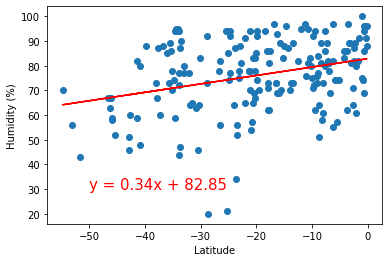

In [113]:
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
labelpos = (-50, 30)
plotLinRegress(south['Lat'], south['Humidity'], xlabel, ylabel, labelpos, 'south_humid_v_lat')

The two above graphs show a small correlation between latitude and humidity of a city. THe further north you are in your hemisphere, the higher the average humidity should be. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0597462166581681


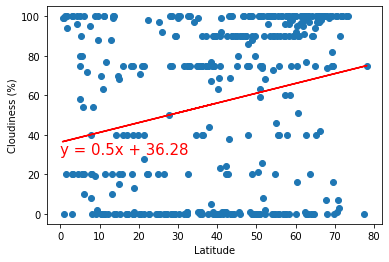

In [114]:
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
labelpos = (0,30)
plotLinRegress(north['Lat'], north['Cloudiness'], xlabel, ylabel, labelpos, 'north_clouds_v_lat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02210718158066014


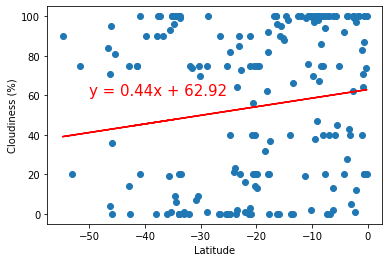

In [115]:
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
labelpos = (-50,60)
plotLinRegress(south['Lat'], south['Cloudiness'], xlabel, ylabel, labelpos, 'south_clouds_v_lat')

One observation we can take away from the above two graphs is how cloudiness seems to collect around the extreme values. Both hemispheres show lots of numbers at the 0 and 100 mark respectivley, with large gaps in the middle.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03634609955520965


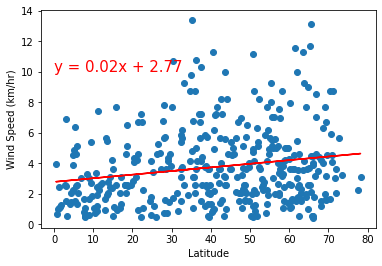

In [116]:
xlabel = 'Latitude'
ylabel = 'Wind Speed (km/hr)'
labelpos = (0,10)
plotLinRegress(north['Lat'], north['Wind Speed'], xlabel, ylabel, labelpos, 'north_wind_v_lat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2259720703384639


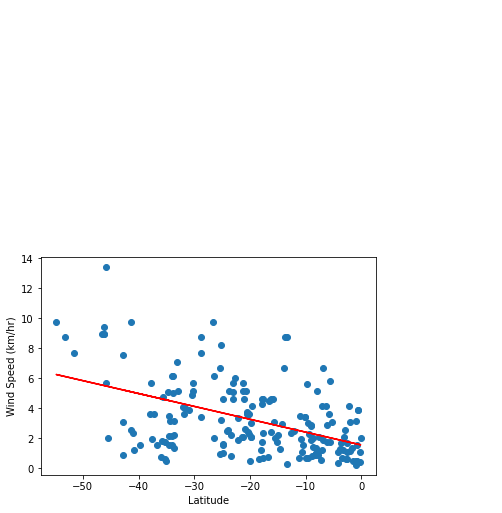

In [117]:
xlabel = 'Latitude'
ylabel = 'Wind Speed (km/hr)'
labelpos = (0,30)
plotLinRegress(south['Lat'], south['Wind Speed'], xlabel, ylabel, labelpos, 'south_wind_v_lat')

In the two plots above that compare windiness with latitude, you can see that at the poles are where the highest wind conditions are. In both graphs, the values are noticibly lower around the equator.